In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
url = 'https://ds-lecture-data.s3.ap-northeast-2.amazonaws.com/datasets/vgames2.csv'

In [3]:
r_data = pd.read_csv(url)

In [4]:
r_data

,Unnamed: 0,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales
0,1,Candace Kane's Candy Factory,DS,2008.0,Action,Destineer,0.04,0,0,0
1,2,The Munchables,Wii,2009.0,Action,Namco Bandai Games,0.17,0,0,0.01
2,3,Otome wa Oanesama Boku ni Koi Shiteru Portable,PSP,2010.0,Adventure,Alchemist,0,0,0.02,0
3,4,Deal or No Deal: Special Edition,DS,2010.0,Misc,Zoo Games,0.04,0,0,0
4,5,Ben 10 Ultimate Alien: Cosmic Destruction,PS3,2010.0,Platform,D3Publisher,0.12,0.09,0,0.04
...,...,...,...,...,...,...,...,...,...,...
16593,16594,Ice Age 2: The Meltdown,GC,2006.0,Platform,Vivendi Games,0.15,0.04,0,0.01
16594,16595,Rainbow Islands: Revolution,PSP,2005.0,Action,Rising Star Games,0.01,0,0,0
16595,16596,NBA 2K16,PS3,2015.0,Sports,Take-Two Interactive,0.44,0.19,0.03,0.13
16596,16597,Toukiden: The Age of Demons,PSV,2013.0,Action,Tecmo Koei,0.05,0.05,0.25,0.03


In [5]:
r_data.columns

Index(['Unnamed: 0', 'Name', 'Platform', 'Year', 'Genre', 'Publisher',
       'NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales'],
      dtype='object')

In [7]:
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

In [6]:
r_data.info()
# Unnamed 인덱스인듯 삭제
# 데이터 타입 변경 필요
# Year는 int
# sales들은 float

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16598 entries, 0 to 16597
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Unnamed: 0   16598 non-null  int64  
 1   Name         16598 non-null  object 
 2   Platform     16598 non-null  object 
 3   Year         16327 non-null  float64
 4   Genre        16548 non-null  object 
 5   Publisher    16540 non-null  object 
 6   NA_Sales     16598 non-null  object 
 7   EU_Sales     16598 non-null  object 
 8   JP_Sales     16598 non-null  object 
 9   Other_Sales  16598 non-null  object 
dtypes: float64(1), int64(1), object(8)
memory usage: 1.3+ MB


In [8]:
r_data.isna().sum()
# 결측치. 처리는 어떻게?
# 채워넣을 수 있는 건 채워넣기

Unnamed: 0       0
Name             0
Platform         0
Year           271
Genre           50
Publisher       58
NA_Sales         0
EU_Sales         0
JP_Sales         0
Other_Sales      0
dtype: int64

In [9]:
r_data.describe()
# 연도 최솟값이 0임을 확인

,Unnamed: 0,Year
count,16598.000000,16327.000000
mean,8299.500000,1994.242543
std,4791.574219,155.077168
min,1.000000,0.000000
25%,4150.250000,2003.000000
50%,8299.500000,2007.000000
75%,12448.750000,2010.000000
max,16598.000000,2020.000000


(array([  100.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
            0., 16227.]),
 array([   0.,  202.,  404.,  606.,  808., 1010., 1212., 1414., 1616.,
        1818., 2020.]),
 <a list of 10 Patch objects>)

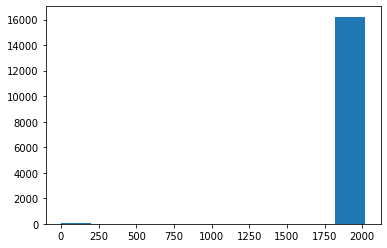

In [ ]:
plt.hist(r_data.Year)

(array([ 108.,   64.,   89.,  438., 1261., 2420., 3896., 5220., 2388.,
         343.]),
 array([1980., 1984., 1988., 1992., 1996., 2000., 2004., 2008., 2012.,
        2016., 2020.]),
 <a list of 10 Patch objects>)

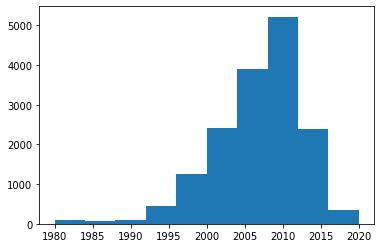

In [ ]:
plt.hist(r_data.Year[r_data.Year>=1700])
# 1980년도 이후부터 채택 -> 그 이전은 드랍? 대체?

In [ ]:
les1980 = r_data[r_data.Year < 1980]
len(les1980) #100개

100

In [ ]:
r_data.loc[r_data.Year < 1980, 'Year']=np.nan # 혹시 중복 대체 가능할지 몰라서 우선 nan으로 변환

In [ ]:
r_data.describe()

,Unnamed: 0,Year
count,16598.000000,16227.000000
mean,8299.500000,2006.406052
std,4791.574219,5.827661
min,1.000000,1980.000000
25%,4150.250000,2003.000000
50%,8299.500000,2007.000000
75%,12448.750000,2010.000000
max,16598.000000,2020.000000


In [ ]:
r_data.isna().sum() # Year에 결측치 100개 증가 확인

Unnamed: 0       0
Name             0
Platform         0
Year           371
Genre           50
Publisher       58
NA_Sales         0
EU_Sales         0
JP_Sales         0
Other_Sales      0
dtype: int64

In [ ]:
i_data = r_data.drop('Unnamed: 0', axis=1)
i_data.head()

# 인덱스 삭제
# 일단 키값으로 이용하고 나중에 삭제?

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales
0,Candace Kane's Candy Factory,DS,2008.0,Action,Destineer,0.04,0,0,0
1,The Munchables,Wii,2009.0,Action,Namco Bandai Games,0.17,0,0,0.01
2,Otome wa Oanesama Boku ni Koi Shiteru Portable,PSP,2010.0,Adventure,Alchemist,0,0,0.02,0
3,Deal or No Deal: Special Edition,DS,2010.0,Misc,Zoo Games,0.04,0,0,0
4,Ben 10 Ultimate Alien: Cosmic Destruction,PS3,2010.0,Platform,D3Publisher,0.12,0.09,0,0.04


In [ ]:
# Genre가 nan인 데이터
missing_Genre = i_data[i_data['Genre'].isna()]
nGenre_Name = missing_Genre['Name'].unique()
nGenre_Name

array(['Ape Escape: On the Loose', 'NBA Ballers', 'NFL Street',
       'SingStar Singalong With Disney', 'Pokemon X/Pokemon Y',
       'NASCAR Racing', 'Jurassic Park III: Island Attack',
       'The Godfather: Dons Edition', 'Ski-Doo Snowmobile Challenge',
       'Batman Beyond: Return of the Joker',
       'Princess Saver! Eternal Love for My Lady', 'MVP Baseball 2004',
       'Grand Theft Auto IV', 'Brain Quest: Grades 5 & 6',
       'Dragon Ball Z: Ultimate Tenkaichi', 'Wii Party',
       'Astonishia Story', 'Chrono Cross', 'Back to the Future: The Game',
       'Medabots: Metabee', 'UFO: Trilogy',
       'Largo Winch .// Commando Sar', 'Madden NFL 11', 'Ukiyo no Shishi',
       'Myth Makers: Orbs of Doom', 'Final Fantasy XII',
       'The Mummy: Tomb of the Dragon Emperor', 'Bakemonogatari Portable',
       'Karaoke Revolution Glee: Volume 3', 'Puppy Palace', 'Yakuza 3',
       'Cloudy With a Chance of Meatballs', 'F-Zero X',
       'The History Channel: Battle for the Pacific', '

In [ ]:
missing_Genre.shape

(50, 9)

In [ ]:
missing_Genre.duplicated().sum()

0

In [ ]:
# Genre가 존재하는 데이터
yesGenre = i_data.copy()
yesGenre = yesGenre.dropna(subset=['Genre'])

# 동일 Name 존재 여부 확인
have_Genre = []

for data in yesGenre['Name']:
    if data in nGenre_Name:
        have_Genre.append(data)

In [ ]:
yesGenre.shape

(16548, 9)

In [ ]:
have_Genre #Name이 중복되는 값으로 해당 값의 Genre로 결측 Genre 대체하기 위해 동일한 Name의 리스트를 찾았다

In [ ]:
yg_uniq = yesGenre.drop_duplicates(subset='Name')
yg_uniq.shape

(11463, 9)

In [ ]:
# yg_uniq_genre = yg_uniq[['Name','Genre']]
# yg_uniq_genre.head()

,Name,Genre
0,Candace Kane's Candy Factory,Action
1,The Munchables,Action
2,Otome wa Oanesama Boku ni Koi Shiteru Portable,Adventure
3,Deal or No Deal: Special Edition,Misc
4,Ben 10 Ultimate Alien: Cosmic Destruction,Platform


In [ ]:
# have_Genre 기준으로 머지하기

# have_Genre를 DF로
dictodf = {'Name': have_Genre}
df_hg = pd.DataFrame(dictodf)

# Genre를 넣어보자
df_hg = df_hg.merge(yg_uniq, left_on='Name', right_on='Name')
df_hg.head()

# 같은 name을 가진 게임의 genre 결측치를 대체할 수 있는 데이터프레임을 찾았다

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales
0,MVP Baseball 2004,GC,2004.0,Sports,Electronic Arts,0.2,0.05,0,0.01
1,MVP Baseball 2004,GC,2004.0,Sports,Electronic Arts,0.2,0.05,0,0.01
2,Skylanders Giants,3DS,2012.0,Action,Activision,0.12,0.01,0,0.01
3,Skylanders Giants,3DS,2012.0,Action,Activision,0.12,0.01,0,0.01
4,Skylanders Giants,3DS,2012.0,Action,Activision,0.12,0.01,0,0.01


In [ ]:
df_hg.isna().sum()

Name           0
Platform       0
Year           0
Genre          0
Publisher      0
NA_Sales       0
EU_Sales       0
JP_Sales       0
Other_Sales    0
dtype: int64

In [ ]:
df_hg.shape #2개는 여전히 결측치 nan으로 존재

(48, 9)

In [ ]:
df_hg['Genre'].unique()

array(['Sports', 'Action', 'Adventure', 'Racing', 'Shooter', 'Platform',
       'Simulation', 'Fighting', 'Misc'], dtype=object)

In [ ]:
# df_hg[df_hg.Genre == 'Misc'] # Misc는 무슨 장르? 개발사 이름이 잘못 들어간건가?

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales
47,Karaoke Revolution Glee: Volume 3,X360,2011.0,Misc,Konami Digital Entertainment,0.13,0,0,0.01


In [ ]:
# Year가 nan인 데이터
missing_Year = i_data[i_data['Year'].isna()]
nYear_Name = missing_Year['Name'].unique()

In [ ]:
missing_Year.shape

(371, 9)

In [ ]:
# Year가 존재하는 데이터
yesYear = i_data.copy()
yesYear = yesYear.dropna(subset=['Year'])

# 동일 Name 존재 여부 확인
have_Year = []

for data in yesYear['Name']:
    if data in nYear_Name:
        have_Year.append(data)

have_Year

#Name이 중복되는 값으로 해당 값의 결측 Year를 대체하기 위해 동일한 Name이 들어있는 리스트를 찾았다

['World of Tanks',
 'Jikkyou Powerful Pro Baseball 2016',
 'Madden NFL 07',
 'NASCAR Unleashed',
 'Glover',
 'Madden NFL 07',
 'Shrek the Third',
 'Casper',
 'Madden NFL 2002',
 'LEGO Star Wars II: The Original Trilogy',
 'Karaoke Revolution Presents American Idol Encore',
 'Space Invaders',
 'The Chronicles of Narnia: The Lion, The Witch and The Wardrobe',
 'BioShock 2',
 'PES 2009: Pro Evolution Soccer',
 'NASCAR Unleashed',
 'LEGO Star Wars II: The Original Trilogy',
 'Assetto Corsa',
 'FIFA Soccer 2004',
 'S.C.A.R.S',
 'GRID',
 'Majesty 2: The Fantasy Kingdom Sim',
 'Shaun White Snowboarding',
 'Winning Eleven: Pro Evolution Soccer 2007',
 'Hitman 2: Silent Assassin',
 'The Chronicles of Narnia: The Lion, The Witch and The Wardrobe',
 'Gun',
 'The Elder Scrolls V: Skyrim',
 'Shaun White Snowboarding',
 'Shrek the Third',
 'Karaoke Revolution Presents American Idol Encore',
 'NASCAR Thunder 2003',
 'Danganronpa: Trigger Happy Havoc',
 'Madden NFL 06',
 'Madden NFL 2002',
 'LEGO Indi

In [ ]:
yy_uniq = yesYear.drop_duplicates(subset='Name')
yy_uniq.shape

(11303, 9)

In [ ]:
# yy_uniq_year = yy_uniq[['Name','Year']]
# yy_uniq_year.head()

In [ ]:
# have_Year 기준으로 머지하기

# have_Year를 DF로
dictodf_y = {'Name': have_Year}
df_hy = pd.DataFrame(dictodf_y)

# Genre를 넣어보자
df_hy = df_hy.merge(yy_uniq, left_on='Name', right_on='Name')
df_hy.tail()

# 같은 name을 가진 게임의 genre 결측치를 대체할 수 있는 데이터프레임을 찾았다

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales
269,Godzilla: Destroy All Monsters Melee,GC,2002.0,Fighting,Atari,0.55,0.14,0,0.02
270,Mobile Suit Gundam,SAT,1995.0,Action,Namco Bandai Games,0,0,0.41,0
271,Brothers in Arms: Furious 4,PS3,2012.0,Shooter,Ubisoft,0.01,0.05,0,0.02
272,Metal Gear Solid 2: Substance,PS2,2002.0,Action,Konami Digital Entertainment,0.18,0.14,0.16,0.05
273,Super Robot Wars OG: The Moon Dwellers,PS4,2016.0,Misc,Namco Bandai Games,0,0,0.09,0


In [ ]:
df_hy.isna().sum()

Name           0
Platform       0
Year           0
Genre          0
Publisher      0
NA_Sales       0
EU_Sales       0
JP_Sales       0
Other_Sales    0
dtype: int64

In [ ]:
df_hy.shape #여전히 99개의 결측치 존재

(274, 9)

In [ ]:
df_hy.Year.unique()

array([2011., 2016., 2006., 1999., 2007., 2002., 2001., 2008., 2005.,
       2010., 2003., 1998., 2009., 2013., 2004., 2012., 2000., 2014.,
       1993., 2015., 1995.])

In [ ]:
# 최초데이터에서 Genre, Year 결측치 드롭 후 대체한 데이터 concat

drop_data = i_data.dropna(subset=['Genre','Year'])

YG_data = pd.concat([drop_data, df_hg, df_hy])
YG_data.head()

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales
0,Candace Kane's Candy Factory,DS,2008.0,Action,Destineer,0.04,0,0,0
1,The Munchables,Wii,2009.0,Action,Namco Bandai Games,0.17,0,0,0.01
2,Otome wa Oanesama Boku ni Koi Shiteru Portable,PSP,2010.0,Adventure,Alchemist,0,0,0.02,0
3,Deal or No Deal: Special Edition,DS,2010.0,Misc,Zoo Games,0.04,0,0,0
4,Ben 10 Ultimate Alien: Cosmic Destruction,PS3,2010.0,Platform,D3Publisher,0.12,0.09,0,0.04


In [ ]:
print(YG_data.shape) 
print(drop_data.shape[0] + df_hg.shape[0] + df_hy.shape[0])

(16499, 9)
16499


In [ ]:
# 목적 중 게임 장르와 연도를 이용하여 알아낼 수 있는 항목이 있으므로, 해당 항목을 중요시하여 
# 대체할 수 없는 결측치는 전부 폐기하겠음

In [ ]:
# 실수형 타입의 연도를 정수형으로 변환
YG_data['Year'].unique()

array([2008., 2009., 2010., 2005., 2011., 2007., 2001., 2003., 2006.,
       2014., 2015., 2002., 1997., 2013., 1996., 2004., 2000., 1984.,
       1998., 2016., 1985., 1999., 1995., 1993., 2012., 1987., 1982.,
       1994., 1990., 1992., 1991., 1983., 1988., 1981., 1989., 1986.,
       2017., 1980., 2020.])

In [ ]:
YG_data.Year = YG_data['Year'].astype(int)
YG_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16499 entries, 0 to 273
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Name         16499 non-null  object
 1   Platform     16499 non-null  object
 2   Year         16499 non-null  int64 
 3   Genre        16499 non-null  object
 4   Publisher    16463 non-null  object
 5   NA_Sales     16499 non-null  object
 6   EU_Sales     16499 non-null  object
 7   JP_Sales     16499 non-null  object
 8   Other_Sales  16499 non-null  object
dtypes: int64(1), object(8)
memory usage: 1.3+ MB


In [ ]:
# Sales 자료 확인
# YG_data.sort_values(['NA_Sales'], ascending = True)
# 숫자 뒤에 알파벳 붙은 것을 확인
# 숫자만 꺼내서 데이터 타입을 float로 변경

# YG_data['NA'] = YG_data.NA_Sales.str.extract('(\d+)').astype('float')
# YG_data['EU'] = YG_data.EU_Sales.str.extract('(\d+)').astype('float')
# YG_data['JP'] = YG_data.JP_Sales.str.extract('(\d+)').astype('float')
# YG_data['Other'] = YG_data.Other_Sales.str.extract('(\d+)').astype('float')
# YG_data.head()

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,NA,EU,JP,Other
0,Candace Kane's Candy Factory,DS,2008,Action,Destineer,0.04,0,0,0,0.0,0.0,0.0,0.0
1,The Munchables,Wii,2009,Action,Namco Bandai Games,0.17,0,0,0.01,0.0,0.0,0.0,0.0
2,Otome wa Oanesama Boku ni Koi Shiteru Portable,PSP,2010,Adventure,Alchemist,0,0,0.02,0,0.0,0.0,0.0,0.0
3,Deal or No Deal: Special Edition,DS,2010,Misc,Zoo Games,0.04,0,0,0,0.0,0.0,0.0,0.0
4,Ben 10 Ultimate Alien: Cosmic Destruction,PS3,2010,Platform,D3Publisher,0.12,0.09,0,0.04,0.0,0.0,0.0,0.0


In [ ]:
YG_data['NA'] = pd.to_numeric(YG_data['NA_Sales'], errors = 'coerce')
YG_data['EU'] = pd.to_numeric(YG_data['EU_Sales'], errors = 'coerce')
YG_data['JP'] = pd.to_numeric(YG_data['JP_Sales'], errors = 'coerce')
YG_data['Other'] = pd.to_numeric(YG_data['Other_Sales'], errors = 'coerce')
YG_data.head()

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,NA,EU,JP,Other
0,Candace Kane's Candy Factory,DS,2008,Action,Destineer,0.04,0,0,0,0.04,0.00,0.00,0.00
1,The Munchables,Wii,2009,Action,Namco Bandai Games,0.17,0,0,0.01,0.17,0.00,0.00,0.01
2,Otome wa Oanesama Boku ni Koi Shiteru Portable,PSP,2010,Adventure,Alchemist,0,0,0.02,0,0.00,0.00,0.02,0.00
3,Deal or No Deal: Special Edition,DS,2010,Misc,Zoo Games,0.04,0,0,0,0.04,0.00,0.00,0.00
4,Ben 10 Ultimate Alien: Cosmic Destruction,PS3,2010,Platform,D3Publisher,0.12,0.09,0,0.04,0.12,0.09,0.00,0.04


In [ ]:
YG_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16499 entries, 0 to 273
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Name         16499 non-null  object 
 1   Platform     16499 non-null  object 
 2   Year         16499 non-null  int64  
 3   Genre        16499 non-null  object 
 4   Publisher    16463 non-null  object 
 5   NA_Sales     16499 non-null  object 
 6   EU_Sales     16499 non-null  object 
 7   JP_Sales     16499 non-null  object 
 8   Other_Sales  16499 non-null  object 
 9   NA           16306 non-null  float64
 10  EU           16299 non-null  float64
 11  JP           16301 non-null  float64
 12  Other        16292 non-null  float64
dtypes: float64(4), int64(1), object(8)
memory usage: 1.8+ MB


In [ ]:
fin_data= YG_data[['Name', 'Platform', 'Year', 'Genre', 'Publisher', 'NA', 'EU', 'JP', 'Other']]
fin_data.head()

,Name,Platform,Year,Genre,Publisher,NA,EU,JP,Other
0,Candace Kane's Candy Factory,DS,2008,Action,Destineer,0.04,0.00,0.00,0.00
1,The Munchables,Wii,2009,Action,Namco Bandai Games,0.17,0.00,0.00,0.01
2,Otome wa Oanesama Boku ni Koi Shiteru Portable,PSP,2010,Adventure,Alchemist,0.00,0.00,0.02,0.00
3,Deal or No Deal: Special Edition,DS,2010,Misc,Zoo Games,0.04,0.00,0.00,0.00
4,Ben 10 Ultimate Alien: Cosmic Destruction,PS3,2010,Platform,D3Publisher,0.12,0.09,0.00,0.04


In [ ]:
fin_data = fin_data.dropna()
fin_data.isna().sum()

Name         0
Platform     0
Year         0
Genre        0
Publisher    0
NA           0
EU           0
JP           0
Other        0
dtype: int64

In [ ]:
fin_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15680 entries, 0 to 273
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Name       15680 non-null  object 
 1   Platform   15680 non-null  object 
 2   Year       15680 non-null  int64  
 3   Genre      15680 non-null  object 
 4   Publisher  15680 non-null  object 
 5   NA         15680 non-null  float64
 6   EU         15680 non-null  float64
 7   JP         15680 non-null  float64
 8   Other      15680 non-null  float64
dtypes: float64(4), int64(1), object(4)
memory usage: 1.2+ MB


In [ ]:
fin_data.describe()

,Year,NA,EU,JP,Other
count,15680.000000,15680.000000,15680.000000,15680.000000,15680.000000
mean,2006.411224,0.269616,0.148055,0.076688,0.049045
std,5.806687,0.836965,0.512026,0.304952,0.192722
min,1980.000000,0.000000,0.000000,0.000000,0.000000
25%,2003.000000,0.000000,0.000000,0.000000,0.000000
50%,2007.000000,0.080000,0.020000,0.000000,0.010000
75%,2010.000000,0.240000,0.110000,0.040000,0.040000
max,2017.000000,41.490000,29.020000,10.220000,10.570000


In [ ]:
#Sales 표준화
sales_data = fin_data[['NA', 'EU', 'JP', 'Other']]

# 정규분포형이 아니므로 minmax 이용. max값이 크긴 하지만 버리고자 하는 값은 아니라고 생각.

from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
scaler.fit(sales_data) #데이터 변환을 위한 기준 정보 설정
sales_scaled = scaler.transform(sales_data)

sales_scaled = pd.DataFrame(data=sales_scaled, columns = sales_data.columns)
sales_scaled.head()

,NA,EU,JP,Other
0,0.000964,0.000000,0.000000,0.000000
1,0.004097,0.000000,0.000000,0.000946
2,0.000000,0.000000,0.001957,0.000000
3,0.000964,0.000000,0.000000,0.000000
4,0.002892,0.003101,0.000000,0.003784


In [ ]:
fin_data.Genre.unique()

array(['Action', 'Adventure', 'Misc', 'Platform', 'Sports', 'Simulation',
       'Role-Playing', 'Puzzle', 'Strategy', 'Fighting', 'Racing',
       'Shooter'], dtype=object)

In [ ]:
len(fin_data.Genre.unique())

12

In [ ]:
genre_num = pd.DataFrame({'Genre':['Action', 'Adventure', 'Misc', 'Platform', 'Sports', 'Simulation',
       'Role-Playing', 'Puzzle', 'Strategy', 'Fighting', 'Racing',
       'Shooter'], 
       'num':[0,1,2,3,4,5,6,7,8,9,10,11]})

genre_num

,Genre,num
0,Action,0
1,Adventure,1
2,Misc,2
3,Platform,3
4,Sports,4
5,Simulation,5
6,Role-Playing,6
7,Puzzle,7
8,Strategy,8
9,Fighting,9


In [ ]:
f_data = fin_data.join(genre_num.set_index(['Genre'])['num'],on=['Genre'])
f_data.head()

,Name,Platform,Year,Genre,Publisher,NA,EU,JP,Other,num
0,Candace Kane's Candy Factory,DS,2008,Action,Destineer,0.04,0.00,0.00,0.00,0
1,The Munchables,Wii,2009,Action,Namco Bandai Games,0.17,0.00,0.00,0.01,0
2,Otome wa Oanesama Boku ni Koi Shiteru Portable,PSP,2010,Adventure,Alchemist,0.00,0.00,0.02,0.00,1
3,Deal or No Deal: Special Edition,DS,2010,Misc,Zoo Games,0.04,0.00,0.00,0.00,2
4,Ben 10 Ultimate Alien: Cosmic Destruction,PS3,2010,Platform,D3Publisher,0.12,0.09,0.00,0.04,3


In [ ]:
fin_data['Genre number'] = fin_data['Genre'].str.replace({'Genre':['Action', 'Adventure', 'Misc', 'Platform', 'Sports', 'Simulation',
       'Role-Playing', 'Puzzle', 'Strategy', 'Fighting', 'Racing', 'Shooter']}, 
       [0,1,2,3,4,5,6,7,8,9,10,11])

fin_data.head()

In [ ]:
# 1. 지역에 따라 선호하는 게임 장르가 다를까
# H0 : 지역에 따라 선호하는 게임 장르가 다르지 않다.
# t-test는 두 그룹일 때, 그러면 anova 이용?

# 장르에 따라 지역 판매량의 유의미한 차이가 있는지.

In [ ]:
sales_scaled.shape

(15680, 4)

In [ ]:
#원래 데이터와 합쳐보자
dum = f_data[['Name', 'Platform', 'Year', 'Genre', 'Publisher', 'num']]
dum.shape

(15680, 6)

In [ ]:
sales_scaled1 = sales_scaled.reset_index()
dum1 = dum.reset_index()

In [ ]:
data1 = pd.concat([dum1, sales_scaled1], axis=1)
data1.head()

In [ ]:
data1.drop('index', axis=1, inplace=True)
data1.head()

,Name,Platform,Year,Genre,Publisher,num,NA,EU,JP,Other
0,Candace Kane's Candy Factory,DS,2008,Action,Destineer,0,0.000964,0.000000,0.000000,0.000000
1,The Munchables,Wii,2009,Action,Namco Bandai Games,0,0.004097,0.000000,0.000000,0.000946
2,Otome wa Oanesama Boku ni Koi Shiteru Portable,PSP,2010,Adventure,Alchemist,1,0.000000,0.000000,0.001957,0.000000
3,Deal or No Deal: Special Edition,DS,2010,Misc,Zoo Games,2,0.000964,0.000000,0.000000,0.000000
4,Ben 10 Ultimate Alien: Cosmic Destruction,PS3,2010,Platform,D3Publisher,3,0.002892,0.003101,0.000000,0.003784


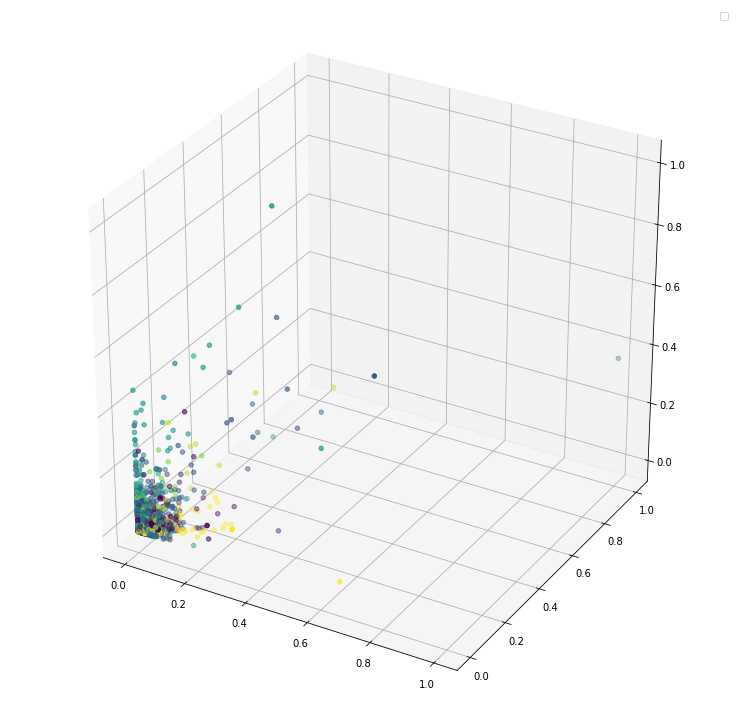

In [ ]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize = (13,13))
ax = fig.add_subplot(111, projection='3d')

xlim=0.6
ax.scatter(xs = data1.NA, ys = data1.EU, zs = data1.JP, c=data1.num)

plt.legend()
plt.show()

In [ ]:
from sklearn.cluster import KMeans

sse = {}

for k in range(1,10):
  kmeans = KMeans(n_clusters=k, random_state=1)
  kmeans.fit(sales_scaled)
  sse[k] = kmeans.inertia_

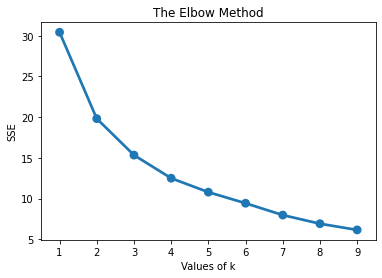

In [ ]:
plt.title('The Elbow Method')
plt.xlabel('Values of k')
plt.ylabel('SSE')
sns.pointplot(x=list(sse.keys()), y=list(sse.values()))
plt.show()

In [ ]:
# 최종 모델 학습
kmeans = KMeans(n_clusters=3, max_iter=50, random_state=42)
kmeans.fit(sales_scaled)

# 고객별 클러스터 지정
cluster_labels = kmeans.labels_

clustered_data = fin_data.assign(Cluster = cluster_labels)

In [ ]:
clustered_data.head()

,Name,Platform,Year,Genre,Publisher,NA,EU,JP,Other,Cluster
0,Candace Kane's Candy Factory,DS,2008,Action,Destineer,0.04,0.00,0.00,0.00,0
1,The Munchables,Wii,2009,Action,Namco Bandai Games,0.17,0.00,0.00,0.01,0
2,Otome wa Oanesama Boku ni Koi Shiteru Portable,PSP,2010,Adventure,Alchemist,0.00,0.00,0.02,0.00,0
3,Deal or No Deal: Special Edition,DS,2010,Misc,Zoo Games,0.04,0.00,0.00,0.00,0
4,Ben 10 Ultimate Alien: Cosmic Destruction,PS3,2010,Platform,D3Publisher,0.12,0.09,0.00,0.04,0


In [ ]:
cluster_avg = clustered_data.groupby(['Cluster']).mean()
cluster_avg

,Year,NA,EU,JP,Other
Cluster,,,,,
0,2006.536841,0.212269,0.112623,0.042368,0.037447
1,2001.607527,1.769866,1.126667,1.206559,0.355484
2,2001.307692,12.511538,6.971923,4.083077,2.481923
